# Bias in Fandango Movie Reviews

This project analyzes the diffence between individual user ratings and aggregate ratings on Fandango after Walt Hickey's article in 2015. We will look at data since Hickey's article to see if Fandango has corrected the issue as they claim. The data is from DataQuest, 2016-2017.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# Read in CSV files
ratings_2015 = pd.read_csv('fandango_score_comparison.csv')
ratings_2017 = pd.read_csv('movie_ratings_16_17.csv')

#### Data sources
https://github.com/mircealex/Movie_ratings_2016_17
https://github.com/fivethirtyeight/data/blob/master/fandango/README.md

### Data Exploration

In [3]:
ratings_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
ratings_2015.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
ratings_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [6]:
ratings_2017.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
# Isolate columns related to Fandango in both data sets
original = ratings_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
new = ratings_2017[['movie', 'year', 'fandango']]

Hickey states that he pulled 510 movies from Fandago which had tickets on sale in 2015. This means the sampling was not random. For the 2016/17 data collected by Alex Olteanu, he collected data for 214 movies across 4 sites including Fandango (Hickey also looked across multiple sites). However, Olteanu only looked at data from 2016 or later because of Hickey's article generated so much publicity that it resulted in Fandango promising to change the way in aggregated ratings.

Considering this limitation, we can really only compare data from these two time perieds. We will look at whether there is any difference between Fandago's ratings in 2016 and 2016. Hickey's original benchmark was a movie that had at least 30 reviews on the website. We will stick to that.

In [8]:
# Check if there are any movies in Hickey's data set with less than 30 reviews
original[original['Fandango_votes'] < 30].count()

FILM                    0
Fandango_Stars          0
Fandango_Ratingvalue    0
Fandango_votes          0
Fandango_Difference     0
dtype: int64

In [9]:
""" 
The new data does not have a column with number of votes but it is already 
curated from popular movies with many ratings according to the github page.
However, we can do a random sample and check the movies on Fandango manually.
"""

new.sample(10, random_state=2)

,movie,year,fandango
23,Bitter Harvest,2017,4.5
155,Table 19,2017,3.0
207,Whiskey Tango Foxtrot,2016,3.5
13,Arsenal,2017,3.5
64,Gold,2016,3.5
131,Pele: Birth of a Legened,2016,4.5
141,Sausage Party,2016,3.5
193,The Secret Life of Pets,2016,4.0
93,Kung Fu Panda 3,2016,4.5
30,Cafe Society,2016,3.5


When checking the number of reviews on Fandango in the above list, I found that they have since gotten rid of their review system and are using Rotten Tomatoes'. Their site only shows a few reviews and then passes you to Rotten Tomatoes for more information. We will have to trust that these movies all had at least 30 reviews on Fandango at the time the data set was compiled. As of this analysis, all had numbers of reviews ranging from the thousands to tens of thousands on RT.

In [10]:
"""
We will focus on comparing the movies from 2015 to the movies from 2016 to see 
how they were rated. The newer data still contains movies from both 2016 and 2017.
The original data has some movies that are not from 2015. We will first separate 
out the data into different years.
"""
new_2016 = new[new['year'] == 2016]
new_2017 = new[new['year'] == 2017]

In [11]:
# Save the films from 2015
original_2015 = original[original['FILM'].str.contains('(2015)')]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



## Analysis

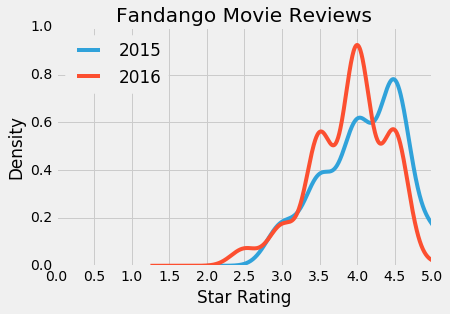

In [12]:
# Generate kernal density plots for both data sets and compare
plt.style.use('fivethirtyeight')

labels = np.arange(0,5.5,0.5)
original_2015['Fandango_Stars'].plot.kde(label='2015')
new_2016['fandango'].plot.kde(label='2016', figsize=(6,4))
plt.title('Fandango Movie Reviews')
plt.xlabel('Star Rating')
plt.xlim(0,5)
plt.xticks(labels);
plt.legend(loc='upper left');

We can see a slight shift in the distribution of the 2016 data to the left in comparison to 2015. It's still not quite a normal distribution but it's less skewed than the 2015 data. It would appear that movies from 2016 tend to be rated slightly lower, possibly up to a half star lower. 

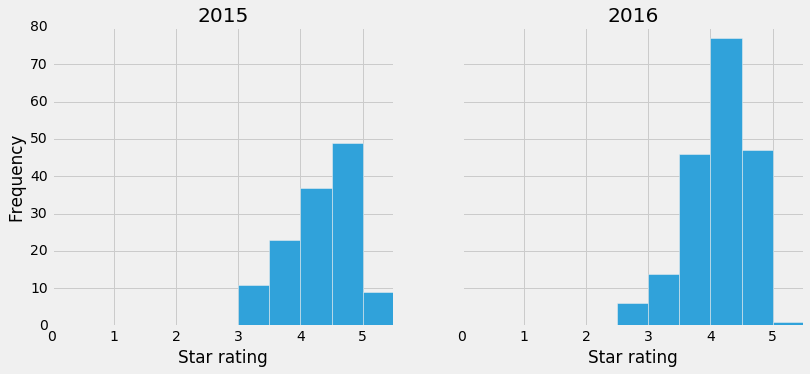

In [13]:
# Visualize both frequency distributions
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(original_2015['Fandango_Stars'], bins=np.arange(0,6,0.5))
# Compensate for different sample sizes the axis is rescaled so both plots have the same axis
ax1.set_ylim(0,80)
ax1.set_xlim(0,5.5)
ax1.set_title('2015')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Star rating')
ax2.hist(new_2016['fandango'], bins=np.arange(0,6,0.5))
ax2.set_xlim(0,5.5)
ax2.set_title('2016')
ax2.set_xlabel('Star rating')
ax2.tick_params(labelleft=False)

The two distributions show a slight shift but because the sample sizes are different, the heights of the bars are noticably taller in the 2016 data. We will redo the same graph using percentages for a sense of proportion.

In [14]:
# Prepare a new dataframe with percent values
perc_2015 = original_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100
perc_2016 = new_2016['fandango'].value_counts(normalize=True).sort_index() * 100
ratings_perc = pd.DataFrame(columns=['2015','2016'], index=np.arange(0,5.5,0.5))
ratings_perc['2015'] = perc_2015
ratings_perc['2016'] = perc_2016
ratings_perc.fillna(0.0, inplace=True)

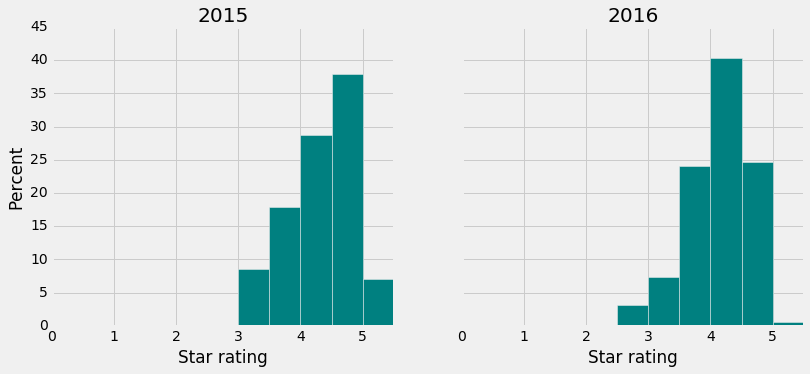

In [15]:
# Visualize distributions by percent
fig2 = plt.figure(figsize=(12,5))
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)

ax3.bar(np.arange(0,5.5,0.5), ratings_perc['2015'], width=0.5, align='edge', color='teal')
ax3.set_xlim(0,5.5)
ax3.set_ylim(0,45)
ax3.set_title('2015')
ax3.set_ylabel('Percent')
ax3.set_xlabel('Star rating')
ax4.bar(np.arange(0,5.5,0.5), ratings_perc['2016'], width=0.5, align='edge', color='teal')
ax4.set_xlim(0,5.5)
ax4.tick_params(labelleft=False)
ax4.set_title('2016')
ax4.set_xlabel('Star rating')

Showing what we saw in the KDE plot, the 2016 data is slightly less skewed than the 2015 data and starts to show the shape of a normal distribution, although still skewed to the left. 

We will briefly compare summary statistics to see the magnitude of the difference.

In [16]:
# Compile summary statistics for the two distributions
summary_stats = pd.DataFrame(columns=['2015','2016'], index=['Mean','Median','Mode'])
# Calculate 2015 statistics
summary_stats.loc['Mean', '2015'] = original_2015['Fandango_Stars'].mean()
summary_stats.loc['Median', '2015'] = original_2015['Fandango_Stars'].median()
summary_stats.loc['Mode', '2015'] = original_2015['Fandango_Stars'].mode()[0]
# Calculate 2016 statistics
summary_stats.loc['Mean', '2016'] = new_2016['fandango'].mean()
summary_stats.loc['Median', '2016'] = new_2016['fandango'].median()
summary_stats.loc['Mode', '2016'] = new_2016['fandango'].mode()[0]
summary_stats

,2015,2016
Mean,4.08527,3.88743
Median,4,4
Mode,4.5,4


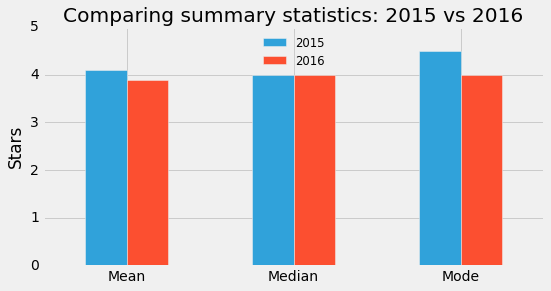

In [17]:
summary_stats.plot.bar(rot=0, figsize=(8,4))
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.ylim(0,5)
plt.legend(loc='upper center', framealpha=0.1, fontsize='small');

The averages are pretty close and the medians are identical. The Mode appears to be be where the largest difference is, a full half star apart. But we still have access to similar data from other websites. Hickey showed in his article a clear bias in Fandango's ratings which led Fandango to respond by saying they had a bug which only rounded up. We can compare the other 2015 data to the 2016 Fandango data since the other websites, presumably did not change their rating system and were the original sites Fandango was benchmarked against.

In [18]:
# We still have all the 2015 movies saved in a dataframe. We'll just use the 
# data from the other websites and compare their distributions. The data has 
# already been normalized across the different rating type
other_sites = ratings_2015[ratings_2015['FILM'].str.contains('(2015)')].reset_index(drop=True)
other_sites = other_sites[['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm']]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [19]:
other_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
RT_user_norm           129 non-null float64
Metacritic_user_nom    129 non-null float64
IMDB_norm              129 non-null float64
dtypes: float64(3)
memory usage: 3.1 KB


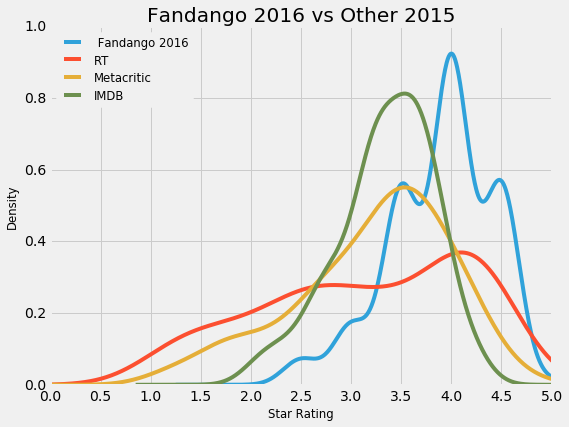

In [20]:
# Let's start with a KDE plot the 2016 Fandango data vs the other sites from 2015
labels = np.arange(0,5.5,0.5)
new_2016['fandango'].plot.kde(label=' Fandango 2016', figsize=(8,6))
other_sites['RT_user_norm'].plot.kde(label='RT')
other_sites['Metacritic_user_nom'].plot.kde(label='Metacritic')
other_sites['IMDB_norm'].plot.kde(label='IMDB')
plt.title('Fandango 2016 vs Other 2015')
plt.xlabel('Star Rating', fontsize='small')
plt.ylabel('Density', fontsize='small')
plt.xlim(0,5)
plt.xticks(labels);
plt.legend(loc='upper left', fontsize='small');

Metacritic and IMDB both have more normal distributions which peak at 3.5. RT has a bit stranger distribution which has a very low peak at 4 stars. The Fandango data is still farther to the right than Metacritic and IMDB and most of RT's data points. Let's look at the histograms. To help analyze, we will convert the frequencies to percents again.

In [148]:
# Calculate relative distributions in percent
perc_2016 = new_2016['fandango'].value_counts(normalize=True).sort_index() * 100
perc_RT = other_sites['RT_user_norm'].value_counts(bins=np.arange(0,5,0.5), normalize=True).sort_index() * 100
perc_MC = other_sites['Metacritic_user_nom'].value_counts(bins=np.arange(0,5,0.5), normalize=True).sort_index() * 100
perc_IMDB = other_sites['IMDB_norm'].value_counts(bins=np.arange(0,5,0.5), normalize=True).sort_index() * 100
# Reindex to use a more flexible format
perc_RT = perc_RT.reindex([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5])
perc_MC = perc_MC.reindex([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5])
perc_IMDB = perc_IMDB.reindex([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5])
# Display distributions in a table
all_ratings_perc = pd.DataFrame(columns=['Fandango 2016','RT','MC','IMDB'], index=np.arange(0.5,5,0.5))
all_ratings_perc['Fandango 2016'] = perc_2016
all_ratings_perc['RT'] = perc_RT
all_ratings_perc['MC'] = perc_MC
all_ratings_perc['IMDB'] = perc_IMDB
all_ratings_perc.fillna(0.0, inplace=True)
all_ratings_perc.drop(index=[0.5], inplace=True)
all_ratings_perc

,Fandango 2016,RT,MC,IMDB
0.5,0.000000,0.000000,0.000000,0.000000
1.0,0.000000,0.775194,0.000000,0.000000
1.5,0.000000,7.751938,2.325581,0.000000
2.0,0.000000,9.302326,8.527132,0.775194
2.5,3.141361,10.852713,6.976744,6.201550
3.0,7.329843,16.279070,16.279070,14.728682
3.5,24.083770,13.178295,27.131783,36.434109
4.0,40.314136,12.403101,27.131783,37.209302
4.5,24.607330,27.906977,10.852713,4.651163


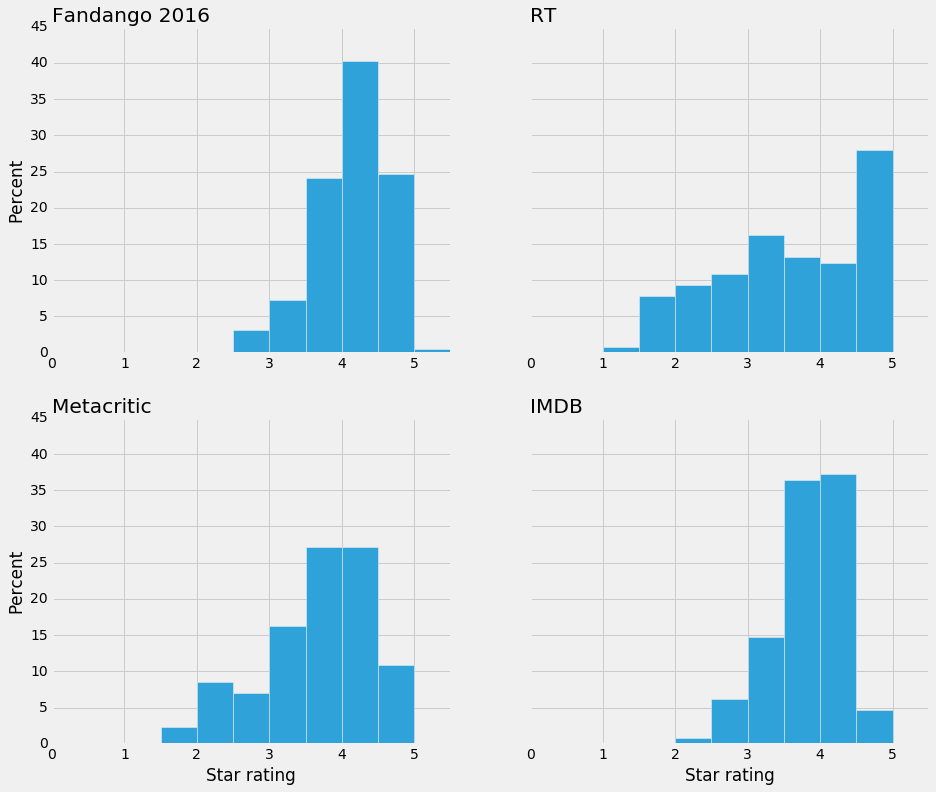

In [144]:
# Visualize all frequency distributions
fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
# Generate a bar chart for 
ax1.bar(np.arange(2.5,5.5,0.5), perc_2016, width=0.5, align='edge', color='#30a2da')
ax1.set_ylim(0,45)
ax1.set_xlim(0,5.5)
ax1.set_title('Fandango 2016', loc='left')
ax1.set_ylabel('Percent')
ax2.bar(perc_RT.index, perc_RT, width=0.5, align='edge', color='#30a2da')
ax2.set_xlim(0,5.5)
ax2.set_ylim(0,45)
ax2.set_title('RT', loc='left')
ax2.tick_params(labelleft=False)
ax3.bar(perc_MC.index, perc_MC, width=0.5, align='edge', color='#30a2da')
ax3.set_xlim(0,5.5)
ax3.set_ylim(0,45)
ax3.set_title('Metacritic', loc='left')
ax3.set_xlabel('Star rating')
ax3.set_ylabel('Percent')
ax4.bar(perc_IMDB.index, perc_IMDB, width=0.5, align='edge', color='#30a2da')
ax4.set_xlim(0,5.5)
ax4.set_ylim(0,45)
ax4.set_title('IMDB', loc='left')
ax4.set_xlabel('Star rating')
ax4.tick_params(labelleft=False)


Interestingly, Fandango's distribution seems to resemble IMBD's. Metacritic and RT have more distributed observations and actually start at 1 or 1.5 stars. Fandango has no observations under 2.5 stars. IMDB is similar to Fandango's but ranges from 2 to 4.5 stars. IMDB also has a very high concentration of observations. Both 3 and 3.5 stars account for over 70% of observations. Finally we'll finish the analysis with summary statistics.

In [151]:
# Compile summary statistics for the two distributions
all_summary_stats = pd.DataFrame(columns=['Fandango 2016', 'RT', 'Metacritic', 'IMDB'], index=['Mean','Median','Mode'])
# Calculate Fandango 2016 statistics
all_summary_stats.loc['Mean', 'Fandango 2016'] = new_2016['fandango'].mean()
all_summary_stats.loc['Median', 'Fandango 2016'] = new_2016['fandango'].median()
all_summary_stats.loc['Mode', 'Fandango 2016'] = new_2016['fandango'].mode()[0]
# Calculate RT statistics
all_summary_stats.loc['Mean', 'RT'] = other_sites['RT_user_norm'].mean()
all_summary_stats.loc['Median', 'RT'] = other_sites['RT_user_norm'].median()
all_summary_stats.loc['Mode', 'RT'] = other_sites['RT_user_norm'].mode()[0]
# Calculate MC statistics
all_summary_stats.loc['Mean', 'Metacritic'] = other_sites['Metacritic_user_nom'].mean()
all_summary_stats.loc['Median', 'Metacritic'] = other_sites['Metacritic_user_nom'].median()
all_summary_stats.loc['Mode', 'Metacritic'] = other_sites['Metacritic_user_nom'].mode()[0]
# Calculate IMDB statistics
all_summary_stats.loc['Mean', 'IMDB'] = other_sites['IMDB_norm'].mean()
all_summary_stats.loc['Median', 'IMDB'] = other_sites['IMDB_norm'].median()
all_summary_stats.loc['Mode', 'IMDB'] = other_sites['IMDB_norm'].mode()[0]

all_summary_stats

,Fandango 2016,RT,Metacritic,IMDB
Mean,3.88743,3.14147,3.21705,3.34186
Median,4,3.25,3.4,3.35
Mode,4,4.05,3.95,3.3


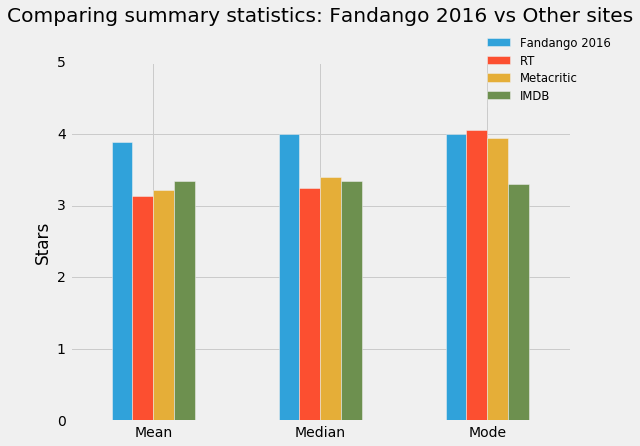

In [176]:
all_summary_stats.plot.bar(rot=0, figsize=(8,6))
plt.title('Comparing summary statistics: Fandango 2016 vs Other sites', y=1.1)
plt.ylabel('Stars')
plt.ylim(0,5)
#plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1,1.1), framealpha=0.1, fontsize='small');

Finding the mode can be difficult with the other sites since their ratings are discrete having been converted from other rating systems to Fandango's 5-star system with only half stars possible. But we can see a clear difference in the mean and median values. Fandango remains over a half star above the other sites.